In [5]:
from gis.line_detection import is_rail_line, get_line_direction
from gis.sam import load_sam, load_sam_predictor, predict_with_point
from gis.tile import download_bbox
import matplotlib.pyplot as plt 

In [6]:
import cv2

In [7]:
def show_image_with_point(image, point, label=1):
    """
    image: np.ndarray (H, W, 3) in RGB
    point: (x, y) coordinates (pixel space)
    label: 1 = positive (green), 0 = negative (red)
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    color = "lime" if label == 1 else "red"
    plt.scatter([point[0]], [point[1]], c=color, s=100, marker="x", linewidths=2)

    plt.title(f"Control point at {point} (label={label})")
    plt.axis("off")
    plt.show()

18 231005 155458


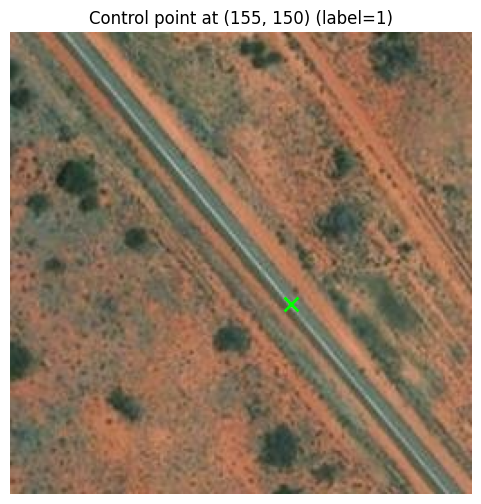

In [8]:
point = (155, 150)
file = 'test18/18_231005_155458.jpg'
z, x, y = file.split('/')[1].split('_')
y =int(y.replace('.jpg', ''))
x = int(x)
y = int(y)
print(z,x,y)
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image_with_point(img, point)

In [9]:
img.shape

(256, 256, 3)

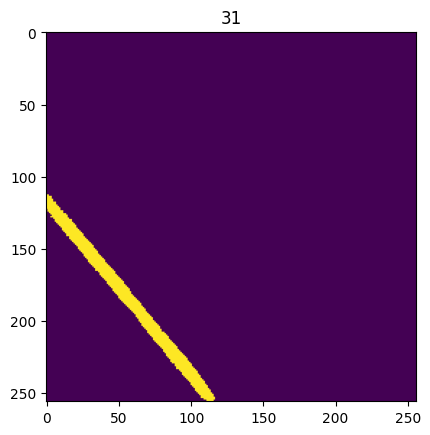

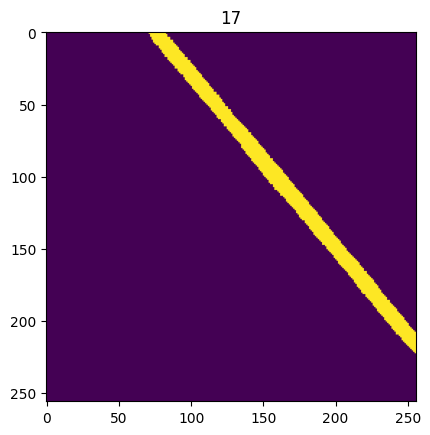

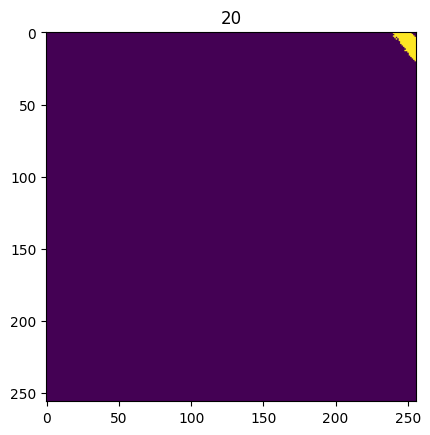

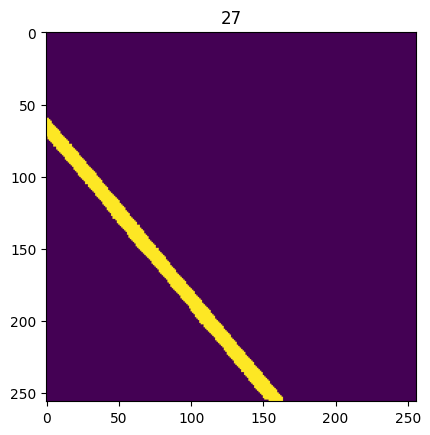

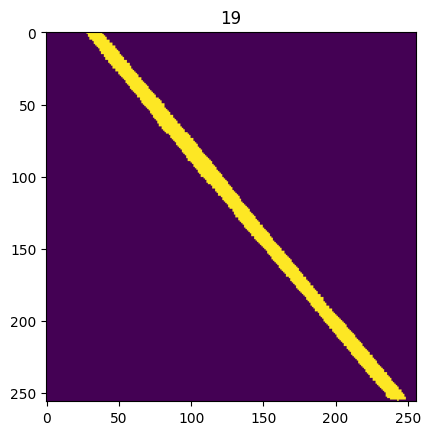

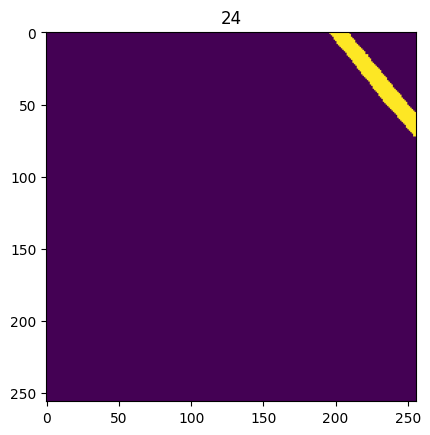

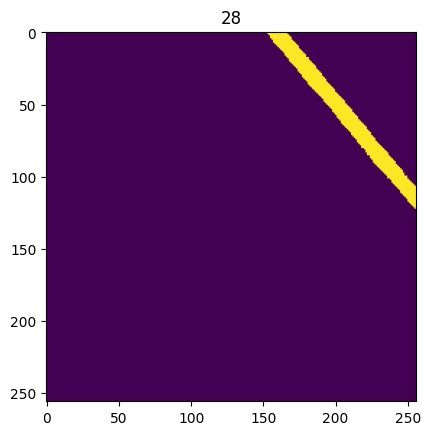

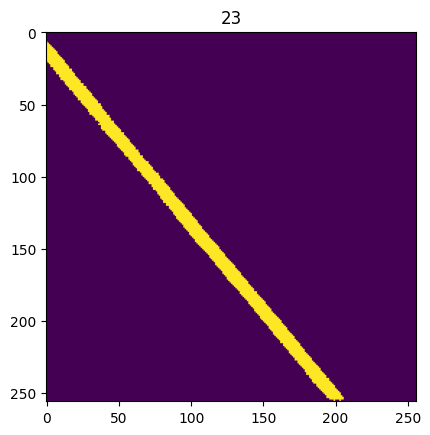

In [10]:
import numpy as np 

import os 

import matplotlib.pyplot as plt 


for file in os.listdir('labels'):
    label = np.load(f'labels/{file}')
    aid = file.split('-')[1]
    plt.imshow(label)
    plt.title(aid)
    plt.show()

In [5]:
# import cv2
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display

# # Load image
# img = cv2.imread(file)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # 
# # Output widget to show coords
# out = widgets.Output()

# def onclick(event):
#     if event.xdata is not None and event.ydata is not None:
#         x, y = int(event.xdata), int(event.ydata)
#         with out:
#             print(f"Clicked at: ({x}, {y})")

# # Plot image
# fig, ax = plt.subplots()
# ax.imshow(img)
# cid = fig.canvas.mpl_connect('button_press_event', onclick)

# display(out)
# #plt.show()


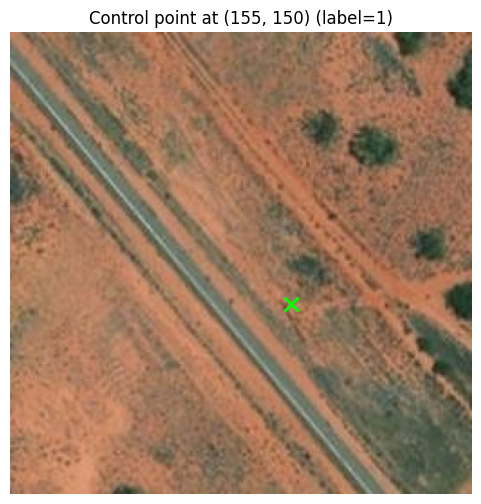

In [6]:
file = f'test18/{z}_{x+1}_{y+1}.jpg'
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image_with_point(img, point)

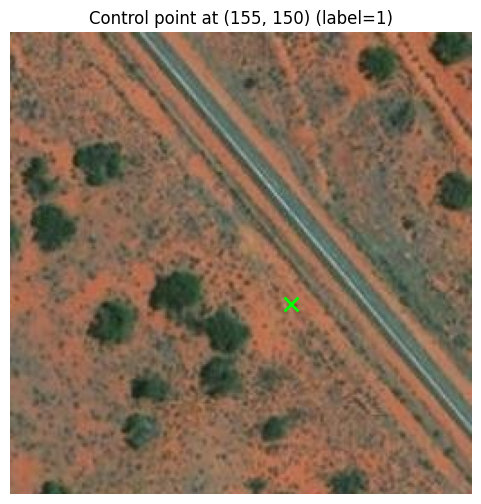

In [7]:
file = f'test18/{z}_{x-1}_{y-1}.jpg'
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image_with_point(img, point)

y +1 is down 


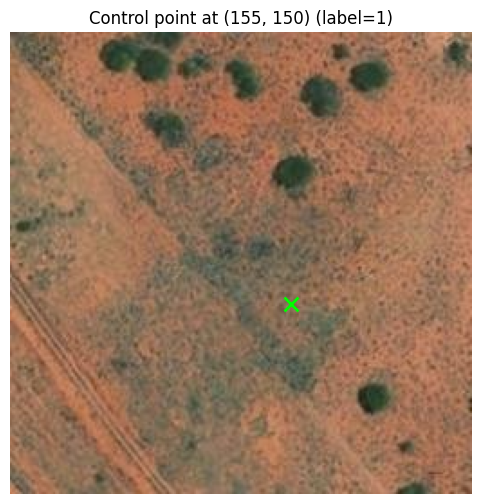

In [8]:
file = f'test18/{z}_{x+1}_{y}.jpg'
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image_with_point(img, point)

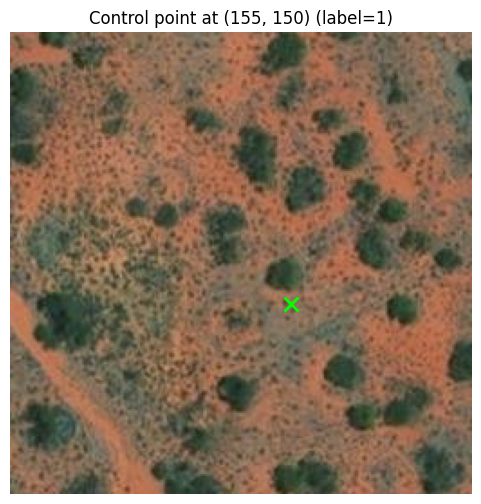

In [9]:
file = f'test18/{z}_{x-1}_{y}.jpg'
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image_with_point(img, point)

In [10]:
from gis.tile import download_tile

download_tile(z, x-1, y-1, out_dir='test18')

Exists: test18/18_231004_155457.jpg


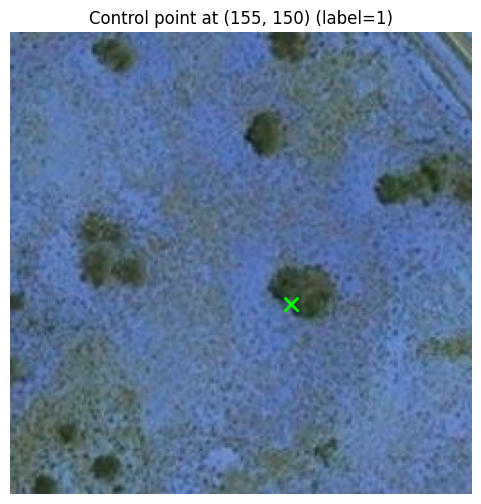

In [11]:
file = f'test18/{z}_{x}_{y+1}.jpg'
img = cv2.imread(file)
show_image_with_point(img, point)

In [12]:


# predictor = load_sam_predictor()

# masks, scores, logits = predict_with_point(predictor, img, point)


predictor = load_sam()

result = predictor.generate(img)
len(result)

33

In [13]:
import numpy as np 

is_rail_line(result[0]['segmentation'].astype(int))

False

In [14]:
rail_masks = []
for r in result:
    m = r['segmentation']
    is_rail = is_rail_line(m.astype(int))
    if is_rail:
        rail_masks.append(m)
        plt.imshow(m)
        plt.title(is_rail)
        plt.show()

In [15]:
for m in masks:
    plt.imshow(m)
    plt.title(get_line_direction(m))
    plt.show()

NameError: name 'masks' is not defined